# HTS Trip Generation Breakdown by Purpose & Mode

Notes:
- Rideshare only made up 1.5% of all trips in 2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read in PSRC 2019 HTS Trips data
trips = pd.read_csv('Household_Travel_Survey_Trips.csv')

C:\Users\jerem\AppData\Local\Temp\ipykernel_16396\741663829.py:1: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,79,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('Household_Travel_Survey_Trips.csv')


In [3]:
# only 2019 trips
trips_19 = trips[trips['survey_year'] == 2019]

In [4]:
# check how many trips have traveller counts that need to be filtered out
trips_19['travelers_total'].value_counts()

travelers_total
 1       36996
 2       19702
 3        8160
 4        3485
 5        1334
 6        1227
-9998      974
-9997      388
 7         335
 8         102
 9          95
 995        56
 0           1
Name: count, dtype: int64

In [5]:
# sum the trips for each unique traveler count
unfiltered_trip_counts = trips_19['travelers_total'].value_counts()
total_unfiltered_trip_count = unfiltered_trip_counts.sum()
total_filtered_trip_count = total_unfiltered_trip_count - unfiltered_trip_counts[-9998] - unfiltered_trip_counts[-9997] - unfiltered_trip_counts[0] - unfiltered_trip_counts[995]

# print unfiltered and filtered trip counts, and percentage of trips that are filtered out
print('Unfiltered trip count: ', total_unfiltered_trip_count)
print('Filtered trip count: ', total_filtered_trip_count)
print('Number of trips filtered out: ', total_unfiltered_trip_count - total_filtered_trip_count)
print('Percentage of trips filtered out: ', 100 * (total_unfiltered_trip_count - total_filtered_trip_count) / total_unfiltered_trip_count)


# sum the trips_weight for each unique traveler count
unfiltered_trip_weights = trips_19.groupby('travelers_total')['trip_weight_2019'].sum()
total_unfiltered_trip_weight = unfiltered_trip_weights.sum()
total_filtered_trip_weight = total_unfiltered_trip_weight - unfiltered_trip_weights[-9998] - unfiltered_trip_weights[-9997] - unfiltered_trip_weights[0] - unfiltered_trip_weights[995]

# print unfiltered and filtered trip weights, and percentage of trips that are filtered out
print('Unfiltered trip weight: ', total_unfiltered_trip_weight)
print('Filtered trip weight: ', total_filtered_trip_weight)
print('Amount of trip weight filtered out: ', total_unfiltered_trip_weight - total_filtered_trip_weight)
print('Percentage of trip weight filtered out: ', 100 * (total_unfiltered_trip_weight - total_filtered_trip_weight) / total_unfiltered_trip_weight)

Unfiltered trip count:  72855
Filtered trip count:  71436
Number of trips filtered out:  1419
Percentage of trips filtered out:  1.947704344245419
Unfiltered trip weight:  16728883.892847704
Filtered trip weight:  16672695.352424972
Amount of trip weight filtered out:  56188.54042273201
Percentage of trip weight filtered out:  0.33587740092305235


From the unweighted trip counts, there are 1,419 trips filtered out from a total of 72,855 trips in 2019 (this is 1.95%).

As weighted trip counts, this represents 56,188 trips filtered out from a total f 16,728,884 trips in 2019 (this is 0.34%).

In [6]:
# discard trips with invalid traveller counts (-9998, -9997, 0, or 995)
trips_19 = trips_19[(trips_19['travelers_total'] > 0) & (trips_19['travelers_total'] < 100)]
trips_19['travelers_total'].value_counts()

travelers_total
1    36996
2    19702
3     8160
4     3485
5     1334
6     1227
7      335
8      102
9       95
Name: count, dtype: int64

In [7]:
# create purpose and mode categories
modes = {'Drive':'Drive', 'Transit':'Transit', 'Bike':'NMT', 'Walk':'NMT', 'Other':'Other'}
trips_19['overall_mode'] = trips_19['mode_simple'].map(modes)

purposes = {'Change mode':'Other', 'Errand/Other':'Errand', 'Escort':'Errand', 'Home':'Home', 'Meal':'Commercial', 'Missing: Non-response':'Other', 'School':'School/Work', 
			'Shop':'Commercial', 'Social/Recreation':'Social', 'Work':'School/Work', 'Work-related':'School/Work'}
trips_19['overall_purpose'] = trips_19['dest_purpose_cat'].map(purposes)

In [10]:
# find median drive trip distance for trips starting and ending in Seattle
drive_trips_seattle = trips_19_seattle[trips_19_seattle['overall_mode'] == 'Drive']
median_drive_distance_seattle = drive_trips_seattle['trip_path_distance'].median()

# find median drive trip distance for trips starting and ending not in Seattle
drive_trips_not_seattle = trips_19_not_seattle[trips_19_not_seattle['overall_mode'] == 'Drive']
median_drive_distance_not_seattle = drive_trips_not_seattle['trip_path_distance'].median()

print('Median drive trip distance for trips starting and ending in Seattle: ', median_drive_distance_seattle)
print('Median drive trip distance for trips starting and ending not in Seattle: ', median_drive_distance_not_seattle)


Median drive trip distance for trips starting and ending in Seattle:  2.1796550000000003
Median drive trip distance for trips starting and ending not in Seattle:  4.33793


In [11]:
# filter for trips made with origin and destination in Seattle PUMAs
# Seattle PUMAs from this site: https://www.census.gov/geographies/reference-maps/2010/geo/2010-pumas/washington.html
seattle_puma10 = [11601, 11602, 11603, 11604, 11605]
trips_19 = trips_19[(trips_19['o_puma10'].isin(seattle_puma10)) & (trips_19['d_puma10'].isin(seattle_puma10))]

# filter out trips greater than 50 miles in distance
trips_19 = trips_19[trips_19['trip_path_distance'] <= 50]
print('The number of unweighted trips in Seattle in 2019 is:', trips_19.shape[0])

The number of unweighted trips in Seattle in 2019 is: 35738


In [12]:
# calculate the weighted number of person-trips in Seattle in 2019
weighted_person_trip_count = trips_19['trip_weight_2019'].sum()
print('The weighted number of person trips in Seattle in 2019 is:', int(weighted_person_trip_count))

The weighted number of person trips in Seattle in 2019 is: 2694389


In [13]:
# calculate the average number of travellers per trip, weighted by the 2019 trip weights
weighted_avg_travelers_per_trip = (trips_19['travelers_total'] * trips_19['trip_weight_2019']).sum() / weighted_person_trip_count
print('The weighted average number of travellers per trip in Seattle in 2019 is:', weighted_avg_travelers_per_trip)

The weighted average number of travellers per trip in Seattle in 2019 is: 1.6364100943736124


In [14]:
# calculate the "vehicle"-trips in Seattle in 2019 by dividing the weighted number of person-trips by the weighted average number of travellers per trip
weighted_vehicle_trip_count = weighted_person_trip_count / weighted_avg_travelers_per_trip
print('The weighted number of "vehicle" trips in Seattle in 2019 is:', int(weighted_vehicle_trip_count))


The weighted number of "vehicle" trips in Seattle in 2019 is: 1646524


The number of weighted PSRC HTS person-trips on a typical weekday in 2019 in Seattle is 2,694,389.

This weighted number of person-trips is converted into a typical weekly number of person-trips using the proportions in this Mori and Kockelman (2024) article: https://findingspress.org/article/118815-day-of-week-month-and-seasonal-demand-variations-comparing-flow-estimates-across-new-travel-data-sources

From the article, assuming that day-of-week proportions follow the NHTS 2016/2017 values, and averaging the Mon-Thu percentages, a typical weekday contains 14.55% of the weekly number of person-trips. Therefore, our weighted PSRC HTS person-trips on a typical week in 2019 in Seattle is 2,694,389 $\div$ 0.1455 = 18,518,137 trips per week.

Compare this to the previous methodology (prior to speaking with Suzanne Childress at PSRC), we had assumed that the 2,701,943 trips was for 4 weekdays (Mon-Thu), which when divided by 4 to get a single weekday, then multiplied by 7 to get an entire week, yielded 7,431,496 weekly trips.

In [ ]:
# overall mode split
mode_split = trips_19[['overall_mode', 'trip_weight_2019']].groupby('overall_mode').sum()
# normalize
mode_split['overall_mode'] = mode_split['trip_weight_2019'] / mode_split['trip_weight_2019'].sum()
mode_split

,trip_weight_2019,overall_mode
overall_mode,,
Drive,1.422697e+06,0.531688
NMT,8.956783e+05,0.334731
Other,3.791570e+04,0.014170
Transit,3.195227e+05,0.119411


In [17]:
# mode_simple split
mode_simple_split = trips_19[['mode_simple', 'trip_weight_2019']].groupby('mode_simple').sum()
# normalize
mode_simple_split['mode_simple'] = mode_simple_split['trip_weight_2019'] / mode_simple_split['trip_weight_2019'].sum()
mode_simple_split

,trip_weight_2019,mode_simple
mode_simple,,
Bike,5.801047e+04,0.021680
Drive,1.422697e+06,0.531688
Other,3.791570e+04,0.014170
Transit,3.195227e+05,0.119411
Walk,8.376678e+05,0.313052


In [18]:
# overall purpose split
purpose_split = trips_19[['overall_purpose', 'trip_weight_2019']].groupby('overall_purpose').sum()
# normalize
purpose_split['purpose_split'] = purpose_split['trip_weight_2019'] / purpose_split['trip_weight_2019'].sum()
purpose_split

,trip_weight_2019,purpose_split
overall_purpose,,
Commercial,421757.414822,0.156532
Errand,524879.173148,0.194804
Home,850478.716718,0.315648
Other,4792.119796,0.001779
School/Work,546257.627391,0.202739
Social,346224.708017,0.128498


In [19]:
# normalize
mode_purpose_split = trips_19[['overall_mode', 'overall_purpose','trip_weight_2019']].groupby(['overall_mode', 'overall_purpose']).sum()
mode_purpose_split['mode_purpose_split'] = np.round(mode_purpose_split['trip_weight_2019'] / mode_purpose_split['trip_weight_2019'].sum()*100, 2)
mode_purpose_split

trip_weight_2019  mode_purpose_split
overall_mode overall_purpose                                      
Drive        Commercial          209922.254515                7.85
             Errand              374476.130030               13.99
             Home                454256.482665               16.98
             Other                  234.972134                0.01
             School/Work         227866.154869                8.52
             Social              155940.776297                5.83
NMT          Commercial          167214.466398                6.25
             Errand               89527.856447                3.35
             Home                262734.076341                9.82
             Other                  537.386822                0.02
             School/Work         206444.356520                7.72
             Social              169220.110665                6.32
Other        Commercial            1695.578941                0.06
             Errand                5667.707310                0.21
             Home                 16592.301949                0.62
             Other                   50.408907                0.00
             School/Work          10613.572824                0.40
             Social                3296.128703                0.12
Transit      Commercial           41402.821390                1.55
             Errand               51125.645877                1.91
             Home                109079.164430                4.08
             Other                 3936.437590                0.15
             School/Work          97544.061315                3.65
             Social               16434.520333                0.61

In [20]:
# show mode_purpose_split for all overall_modes except other
mode_purpose_split = mode_purpose_split.reset_index()
mode_purpose_split = mode_purpose_split[mode_purpose_split['overall_mode'] != 'Other']
mode_purpose_split

,overall_mode,overall_purpose,trip_weight_2019,mode_purpose_split
0,Drive,Commercial,209922.254515,7.85
1,Drive,Errand,374476.130030,13.99
2,Drive,Home,454256.482665,16.98
3,Drive,Other,234.972134,0.01
4,Drive,School/Work,227866.154869,8.52
5,Drive,Social,155940.776297,5.83
6,NMT,Commercial,167214.466398,6.25
7,NMT,Errand,89527.856447,3.35
8,NMT,Home,262734.076341,9.82
9,NMT,Other,537.386822,0.02


### Calculate the number of drive mode vehicle-trips

In [21]:
# filter out drive trips only
drive_trips_19 = trips_19[trips_19['overall_mode'] == 'Drive']

# calculate the weighted number of person-trips in Seattle in 2019 for drive trips
weighted_person_trip_count_drive = drive_trips_19['trip_weight_2019'].sum()

# calculate the average number of travellers per trip for drive trips, weighted by the 2019 trip weights
weighted_avg_travelers_per_trip_drive = (drive_trips_19['travelers_total'] * drive_trips_19['trip_weight_2019']).sum() / weighted_person_trip_count_drive

# calculate the "vehicle"-trips in Seattle in 2019 for drive trips by dividing the weighted number of person-trips by the weighted average number of travellers per trip
weighted_vehicle_trip_count_drive = weighted_person_trip_count_drive / weighted_avg_travelers_per_trip_drive

# print results
print('The weighted number of drive mode person-trips in Seattle in 2019 is:', int(weighted_person_trip_count_drive))
print('The weighted average number of travellers per drive mode trip in Seattle in 2019 is:', weighted_avg_travelers_per_trip_drive)
print('The weighted number of vehicle-trips for drive mode trips in Seattle in 2019 is:', int(weighted_vehicle_trip_count_drive))


The weighted number of drive mode person-trips in Seattle in 2019 is: 1422696
The weighted average number of travellers per drive mode trip in Seattle in 2019 is: 1.6667800599724367
The weighted number of vehicle-trips for drive mode trips in Seattle in 2019 is: 853559


The weighted number of vehicle-trips for the drive mode in Seattle in 2019 on a typical weekday is 853,559 trips.

Converting using the Mori and Kockelman (2024) method (which is dividing by 0.1455), we get a weighted number of vehicle-trips for the drive mode in Seattle on a typical week to be 5,866,384 trips.

The following two code cells perform the same calculations as the cell above, except for transit and NMT trips. These calculations are for reference only, since the conversion from person-trips to vehicle-trips is only relevant for drive mode trips.

In [22]:
# filter out transit trips only
transit_trips_19 = trips_19[trips_19['overall_mode'] == 'Transit']

# calculate the weighted number of person-trips in Seattle in 2019 for transit trips
weighted_person_trip_count_transit = transit_trips_19['trip_weight_2019'].sum()

# calculate the average number of travellers per trip for transit trips, weighted by the 2019 trip weights
weighted_avg_travelers_per_trip_transit = (transit_trips_19['travelers_total'] * transit_trips_19['trip_weight_2019']).sum() / weighted_person_trip_count_transit

# calculate the "vehicle"-trips in Seattle in 2019 for transit trips by dividing the weighted number of person-trips by the weighted average number of travellers per trip
weighted_vehicle_trip_count_transit = weighted_person_trip_count_transit / weighted_avg_travelers_per_trip_transit

# print results
print('The weighted number of transit mode person-trips in Seattle in 2019 is:', int(weighted_person_trip_count_transit))
print('The weighted average number of travellers per transit mode trip in Seattle in 2019 is:', weighted_avg_travelers_per_trip_transit)
print('The weighted number of vehicle-trips for transit mode trips in Seattle in 2019 is:', int(weighted_vehicle_trip_count_transit))

The weighted number of transit mode person-trips in Seattle in 2019 is: 319522
The weighted average number of travellers per transit mode trip in Seattle in 2019 is: 1.3125428553489238
The weighted number of vehicle-trips for transit mode trips in Seattle in 2019 is: 243437


In [23]:
# filter out NMT trips only
nmt_trips_19 = trips_19[trips_19['overall_mode'] == 'NMT']

# calculate the weighted number of person-trips in Seattle in 2019 for NMT trips
weighted_person_trip_count_nmt = nmt_trips_19['trip_weight_2019'].sum()

# calculate the average number of travellers per trip for NMT trips, weighted by the 2019 trip weights
weighted_avg_travelers_per_trip_nmt = (nmt_trips_19['travelers_total'] * nmt_trips_19['trip_weight_2019']).sum() / weighted_person_trip_count_nmt

# calculate the "vehicle"-trips in Seattle in 2019 for NMT trips by dividing the weighted number of person-trips by the weighted average number of travellers per trip
weighted_vehicle_trip_count_nmt = weighted_person_trip_count_nmt / weighted_avg_travelers_per_trip_nmt

# print results
print('The weighted number of NMT mode person-trips in Seattle in 2019 is:', int(weighted_person_trip_count_nmt))
print('The weighted average number of travellers per NMT mode trip in Seattle in 2019 is:', weighted_avg_travelers_per_trip_nmt)
print('The weighted number of vehicle-trips for NMT mode trips in Seattle in 2019 is:', int(weighted_vehicle_trip_count_nmt))

The weighted number of NMT mode person-trips in Seattle in 2019 is: 895678
The weighted average number of travellers per NMT mode trip in Seattle in 2019 is: 1.6884498551475382
The weighted number of vehicle-trips for NMT mode trips in Seattle in 2019 is: 530473


### Calculate average and median VMT of each mode-purpose split

In [24]:
# calculate total trip_path_distance of all drive trips for home purpose
drive_home = trips_19[(trips_19['overall_mode'] == 'Drive') & (trips_19['overall_purpose'] == 'Home')]
drive_home['trip_path_distance'].sum()

# calculate average trip_path_distance of all drive trips for home purpose
drive_home['trip_path_distance'].mean()

# calculate median trip_path_distnce of all drive trips for home purpose
drive_home['trip_path_distance'].median()

2.16694

In [25]:
# iterate across all modes and purposes to calculate average and median trip_path_distance
dist_trips = []
for mode in ['Drive', 'Transit', 'NMT']:
    for purpose in ['Home', 'School/Work', 'Commercial', 'Social', 'Errand']:
        dist_19 = trips_19[(trips_19['overall_mode'] == mode) & (trips_19['overall_purpose'] == purpose)]
        dist_avg = dist_19['trip_path_distance'].mean()
        dist_med = dist_19['trip_path_distance'].median()
        dist_trips.append([mode, purpose, dist_avg, dist_med])
        
        print(f'{mode} {purpose} avg: {dist_avg} med: {dist_med}')

Drive Home avg: 3.037913292516877 med: 2.16694
Drive School/Work avg: 3.572464657557292 med: 2.7424999999999997
Drive Commercial avg: 2.552525084317471 med: 1.7757
Drive Social avg: 3.5424877567901634 med: 2.64385
Drive Errand avg: 2.9867142026808 med: 2.00391
Transit Home avg: 3.8964311646013576 med: 3.42
Transit School/Work avg: 4.147093937577141 med: 3.61265
Transit Commercial avg: 3.1034148089147124 med: 2.182125
Transit Social avg: 3.6044199809533226 med: 2.95514
Transit Errand avg: 3.2814451418506314 med: 2.48971
NMT Home avg: 0.6702242023590412 med: 0.41468
NMT School/Work avg: 0.7173510021056606 med: 0.4010221475
NMT Commercial avg: 0.45625702897339554 med: 0.304785
NMT Social avg: 0.7319000994229863 med: 0.4292336805
NMT Errand avg: 0.5529922823946101 med: 0.351055


In [26]:
dist_trips = pd.DataFrame(dist_trips, columns=['mode', 'purpose', 'avg_dist', 'med_dist'])

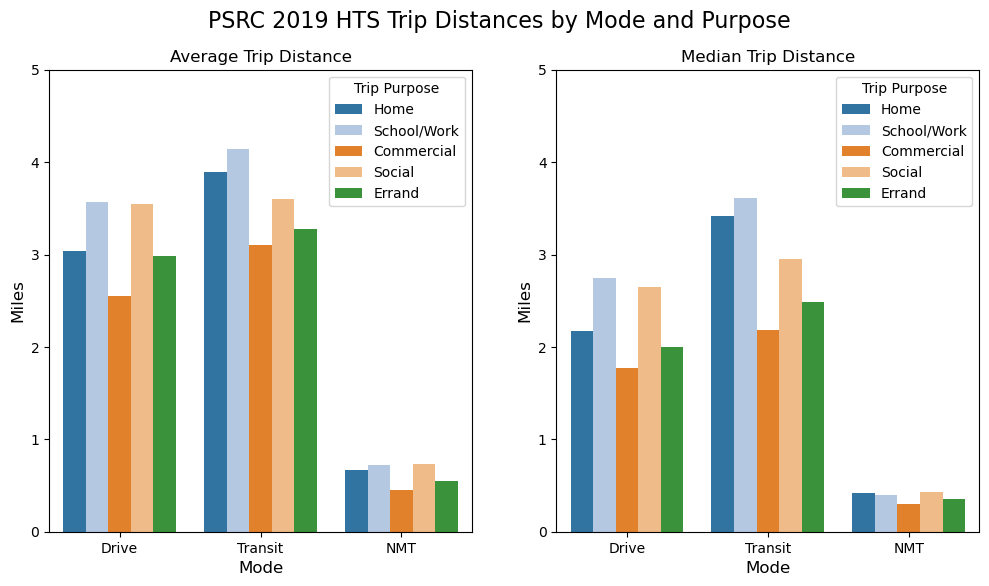

In [27]:
# plot average and median trip distances from dist_trips
# set color scheme
sns.set_palette("tab20")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=dist_trips, x='mode', y='avg_dist', hue='purpose', ax=ax[0])
sns.barplot(data=dist_trips, x='mode', y='med_dist', hue='purpose', ax=ax[1])

# set both subplots to have same y-limits
for a in ax:
    a.set_ylim(0, 5)

ax.flat[0].set_title('Average Trip Distance')
ax.flat[1].set_title('Median Trip Distance')

# set y-labels
ax.flat[0].set_ylabel('Miles', size=12)
ax.flat[1].set_ylabel('Miles', size=12)
ax.flat[0].set_xlabel('Mode', size=12)
ax.flat[1].set_xlabel('Mode', size=12)

# set legend title
ax.flat[0].legend(title='Trip Purpose')
ax.flat[1].legend(title='Trip Purpose')

# set plot title
fig.suptitle('PSRC 2019 HTS Trip Distances by Mode and Purpose', size=16)

plt.show()


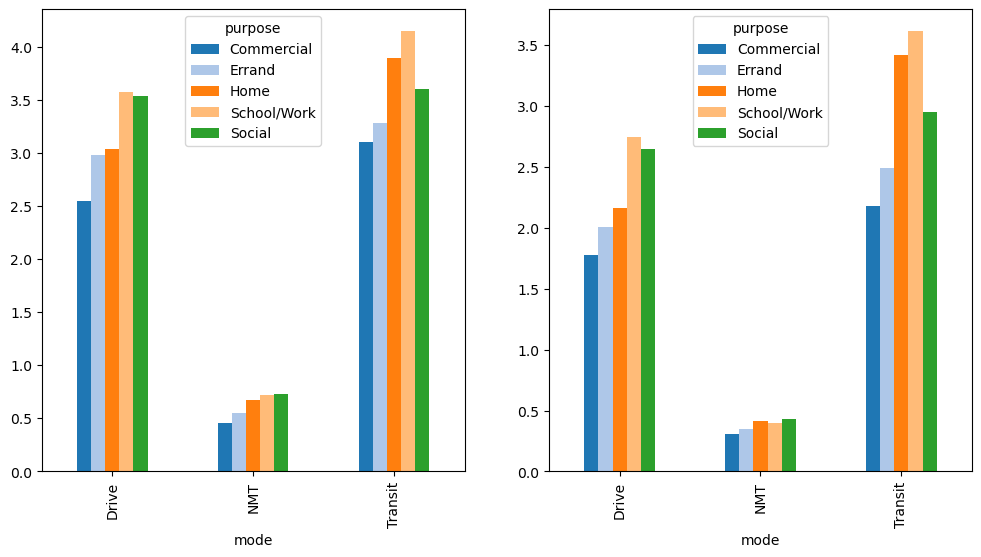

In [28]:
# create grouped bar plot of dist_trips, grouped by average or median
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
dist_trips.pivot(index='mode', columns='purpose', values='avg_dist').plot(kind='bar', ax=ax[0])
dist_trips.pivot(index='mode', columns='purpose', values='med_dist').plot(kind='bar', ax=ax[1])
plt.show()

##### Plot distribution of drive mode trip distances for each purpose

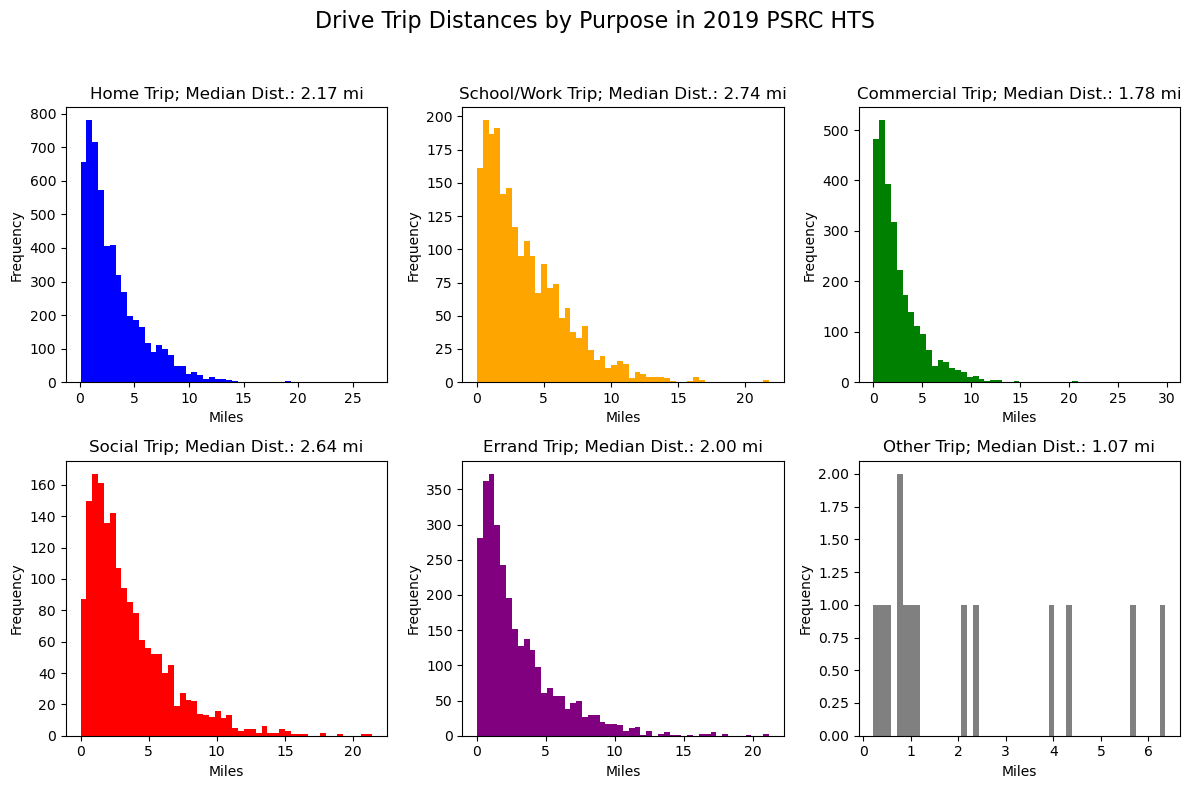

In [29]:
# set parameters for histograms
num_bins = 50
max_dist = 30

# Define a list of colors for each plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'grey']

# Create tiled histograms
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Drive Trip Distances by Purpose in 2019 PSRC HTS', size=16)

for i, purpose in enumerate(['Home', 'School/Work', 'Commercial', 'Social', 'Errand', 'Other']):
    # Filter data for the current purpose and 'Drive' mode
    drive_purpose = trips_19[(trips_19['overall_mode'] == 'Drive') & (trips_19['overall_purpose'] == purpose)]
    
    # Plot histogram with a specific color from the colors list
    ax.flat[i].hist(
        drive_purpose[drive_purpose['trip_path_distance'] < max_dist]['trip_path_distance'], 
        bins=num_bins, 
        color=colors[i]
    )
    
    # Set titles and labels
    ax.flat[i].set_title(f'{purpose} Trip; Median Dist.: {drive_purpose["trip_path_distance"].median():.2f} mi')
    ax.flat[i].set_xlabel('Miles')
    ax.flat[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


### Sanity check to calculate PSRC drive VMT

In [30]:
# calculate the weighted number of vehicle-trips for drive mode trips in Seattle in 2019
weighted_vehicle_trip_count_drive = weighted_person_trip_count_drive / weighted_avg_travelers_per_trip_drive

# calculate the weighted average of median drive trip distance, weighted by purpose share
drive_purpose_split = drive_trips_19[['overall_purpose', 'trip_weight_2019']].groupby('overall_purpose').sum()
drive_purpose_split['purpose_split'] = drive_purpose_split['trip_weight_2019'] / drive_purpose_split['trip_weight_2019'].sum()
drive_purpose_split['med_dist'] = drive_trips_19.groupby('overall_purpose')['trip_path_distance'].median()
weighted_med_dist = (drive_purpose_split['purpose_split'] * drive_purpose_split['med_dist']).sum()

# print results
print('The weighted number of vehicle-trips for drive mode trips in Seattle in 2019 is:', int(weighted_vehicle_trip_count_drive))
print('The weighted average of median drive trip distance in Seattle in 2019 is:', weighted_med_dist)
print('The typical weekday drive mode VMT in Seattle is:', int(weighted_vehicle_trip_count_drive * weighted_med_dist), 'miles')
print('The typical weekly drive mode VMT in Seattle is:', int(weighted_vehicle_trip_count_drive * weighted_med_dist / 0.1455), 'miles')
print('The typical annual drive mode VMT in Seattle is:', int(weighted_vehicle_trip_count_drive * weighted_med_dist / 0.1455 * 52), 'miles')

The weighted number of vehicle-trips for drive mode trips in Seattle in 2019 is: 853559
The weighted average of median drive trip distance in Seattle in 2019 is: 2.2105764268612154
The typical weekday drive mode VMT in Seattle is: 1886859 miles
The typical weekly drive mode VMT in Seattle is: 12968107 miles
The typical annual drive mode VMT in Seattle is: 674341572 miles


In [33]:
# calculate mean number of passengers on drive trips, weighted by trip_weight, sorted by trip purpose
travelers_per_drive_trip = drive_trips_19[['overall_purpose', 'travelers_total', 'trip_weight_2019']].groupby('overall_purpose').apply(lambda x: (x['travelers_total'] * x['trip_weight_2019']).sum() / x['trip_weight_2019'].sum())
travelers_per_drive_trip

overall_purpose
Commercial     1.486582
Errand         1.974900
Home           1.694055
Other          2.069023
School/Work    1.350315
Social         1.551812
dtype: float64